In [1]:
%load_ext autoreload
%autoreload 2

# Demo 2: Two-Dimensional Rastrigin

Our goal will be to train a neural network to predict the Rastrigin function, defined as: 

$
f(x_1 \cdots x_n) = 10n + \sum_{i=1}^n \left(x_i^2 -10 \cos(2\pi x_i)\right)
$

In [2]:
import jenn
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
SEED = 123

### Synthetic Data

Let's define the domain over which we will collect synthetic training data:

In [4]:
lb = (-1.0, -1.0)
ub = (1.5, 1.5)

We will now generate some synthetic data that will be used to train our GENN model later on:

In [5]:
x_train, y_train, dydx_train = jenn.utilities.sample(
    f=jenn.synthetic_data.rastrigin.compute, 
    f_prime=jenn.synthetic_data.rastrigin.compute_partials,
    m_random=100, 
    m_levels=0, 
    lb=lb, 
    ub=ub
)

We also generate some synthetic data that will be used to test the accuracy of the trained model:

In [6]:
x_test, y_test, dydx_test = jenn.utilities.sample(
    f=jenn.synthetic_data.rastrigin.compute, 
    f_prime=jenn.synthetic_data.rastrigin.compute_partials,
    m_random=0, 
    m_levels=10, 
    lb=lb, 
    ub=ub
)

### Training

For comparison, let's train two models: a regular neural network and gradient-enhanced neural network. 

#### Regular Neural Network

In [7]:
%%time 
nn = jenn.NeuralNet(
    layer_sizes=[2, 24, 24, 1],
).fit(
    x=x_train, 
    y=y_train, 
    max_iter=10_000, 
    alpha=0.001, 
    lambd=0.0001, 
    is_normalize=True, 
    random_state=SEED, 
)

CPU times: user 1.91 s, sys: 16.7 ms, total: 1.93 s
Wall time: 1.93 s


#### Gradient-Enhanced Neural Network

In [8]:
%%time 
genn = jenn.NeuralNet(
    layer_sizes=[2, 24, 24, 1],
).fit(
    x=x_train, 
    y=y_train,
    dydx=dydx_train,
    max_iter=10_000, 
    alpha=0.001, 
    lambd=0.0001, 
    is_normalize=True, 
    random_state=SEED, 
)

CPU times: user 3.3 s, sys: 17.6 ms, total: 3.31 s
Wall time: 3.31 s


#### Convergence Histories

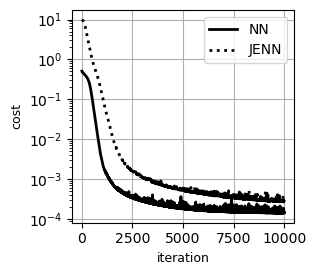

In [9]:
jenn.plot_convergence(histories=[nn.history, genn.history], legend=["NN", "JENN"])

#### Goodness of Fit

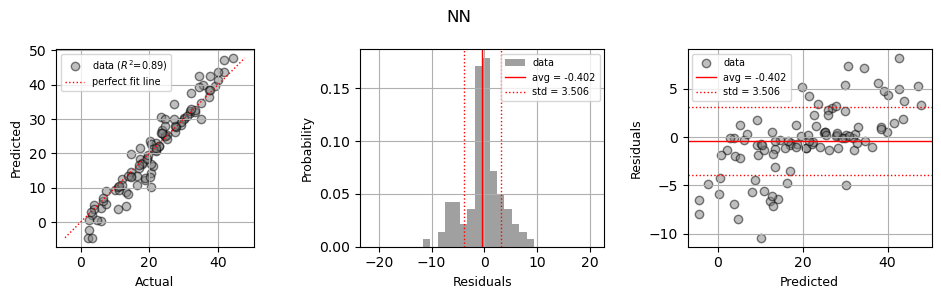

In [10]:
jenn.plot_goodness_of_fit(nn.predict(x_test), y_test, "NN")

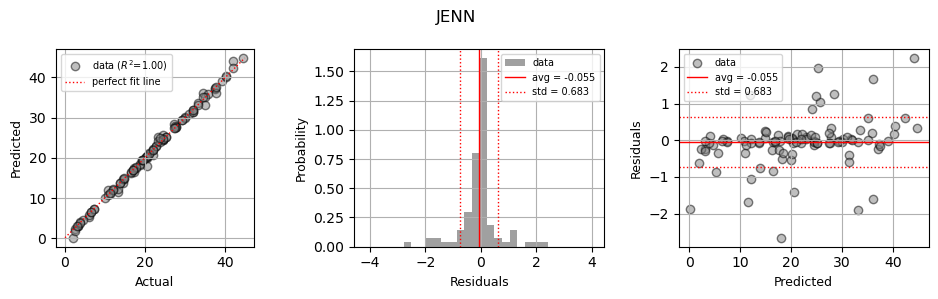

In [11]:
jenn.plot_goodness_of_fit(genn.predict(x_test), y_test, "JENN")

#### Sensitivity Profiles

Sensitivity profiles show how the response varies are one dimension changes, holding all others fixed at $x_0$ (red dot). 

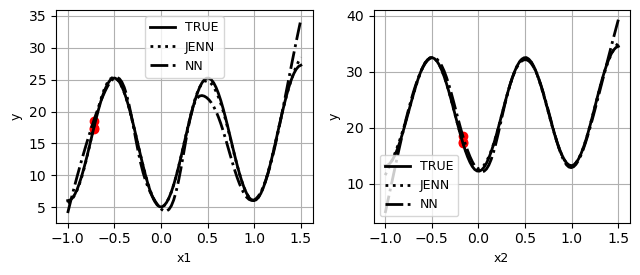

In [13]:
jenn.plot_sensitivity_profiles(
    func=[jenn.synthetic_data.rastrigin.compute, genn.predict, nn.predict], 
    x0=x_test[:, np.random.randint(0, x_test.shape[-1])],
    x_min=x_test.min(axis=1), 
    x_max=x_test.max(axis=1), 
    legend_label=["TRUE", "JENN", "NN"],
    legend_fontsize=9, 
    xlabels=["x1", "x2"], 
    ylabels=["y"]
)

#### Contour Plots

Since this is a two-dimensional function, we can compare the contour plots of the predicted and true response:

In [14]:
def plot_contours():  
    fig, ax = plt.subplots(1, 3, figsize=(12, 3))
    x_min = np.array(lb)
    x_max = np.array(ub)
    figs = [
        jenn.plot_contours(
            func=jenn.synthetic_data.rastrigin.compute, 
            x_min=x_min, 
            x_max=x_max, 
            title="True", 
            ax=ax[0],
            x_train=x_train,
            # x_test=x_test,
            alpha=0.5, 
        ),
        jenn.plot_contours(
            func=genn.predict, 
            x_min=x_min, 
            x_max=x_max, 
            title="JENN",  
            ax=ax[1],
        ),
        jenn.plot_contours(
            func=nn.predict, 
            x_min=x_min, 
            x_max=x_max, 
            title="NN", 
            ax=ax[2],
        )
    ]
    return fig

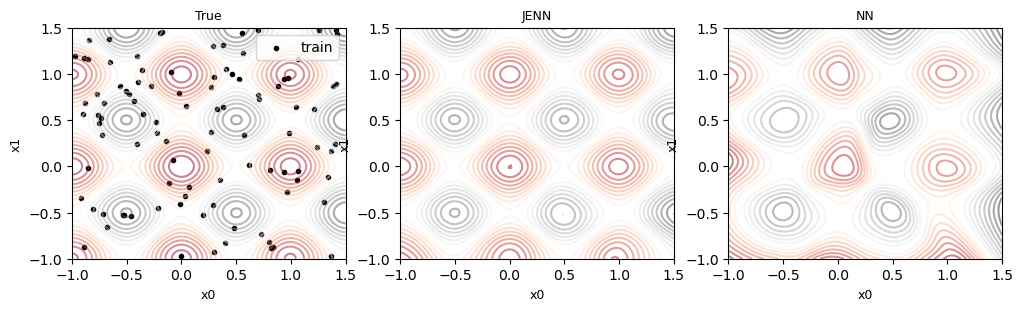

In [15]:
plot_contours()